In [1]:
from glob import glob
import logging
import os
import pyglider.ncprocess as ncprocess
import pyglider.slocum as slocum
import pyglider.utils as pgutils
import pyglider.utils as utils

import xarray as xr


In [2]:
import sys
sys.executable

'C:\\Users\\estel\\miniconda3\\envs\\gliderwork\\python.exe'

In [ ]:
# set up directories and file names

# binarydir = 'C:/Users/estel/Dropbox/SOCCO-UCT/Datasets/unit_1230-from-glider-20260106T093417/' #
rawdir = './delayed_rawnc/'
rawdir_merged = './final_merged_rawnc' 
cacdir = './cac/'
sensorlist = './unit1230_sensors.txt'
deploymentyaml = './deployment.yml'
l1tsdir = './L0-timeseries/'
profiledir = './L0-profiles/'
griddir = './L0-gridfiles/'
scisuffix = 'ebd'
glidersuffix = 'dbd'


In [ ]:
# If some binary files are compressed -- ecd and dcd format - use this to copy them in another folder to be uncompressed with compress.exe file (see on github - issue)

# from pathlib import Path
# import shutil

# src = Path(r"C://Users/estel/Dropbox/SOCCO-UCT/Datasets/unit_1230_20260129/flight/logs_january/")
# dst = Path(r"C://Users/estel/Dropbox/SOCCO-UCT/Datasets/unit_1230_20260129/flight/logs_january_ecd/")

# # create destination folder if it doesn't exist
# dst.mkdir(parents=True, exist_ok=True)

# for file in src.glob("*.dcd"):
#     shutil.copy2(file, dst)  # copy2 preserves metadata


In [4]:
# run this on terminal - way faster with process.py
# convert binary to raw netcdf
# slocum.binary_to_rawnc(
    # binarydir, rawdir, cacdir, sensorlist, deploymentyaml,
    # incremental=True, scisuffix=scisuffix, glidersuffix=glidersuffix)

In [5]:
# # there were some bad profiles, used this code to find them - need to be deleted/moved to another folder manually 
# bad = []
# for fn in sorted(glob("./delayed_rawnc/*.dbd.nc")):
#     try:
#         ds = xr.open_dataset(fn, decode_times=False)
#         zeros = {d:n for d,n in ds.dims.items() if n == 0}
#         if zeros:
#             bad.append((fn, zeros))
#         ds.close()
#     except Exception as e:
#         bad.append((fn, {"open_error": str(e)}))

# print("Total:", len(glob("./delayed_rawnc/*.dbd.nc")))
# print("Bad :", len(bad))
# for fn, why in bad[:30]:
#     print(os.path.basename(fn), why)


# # Total: 1449
# # Bad : 44
# # 00670014.dbd.nc {'_ind': 0}
# # 00670112.dbd.nc {'_ind': 0}
# # 00700014.dbd.nc {'_ind': 0}
# # 00700023.dbd.nc {'_ind': 0}
# # 00700028.dbd.nc {'_ind': 0}
# # 00700091.dbd.nc {'_ind': 0}
# # 00700120.dbd.nc {'_ind': 0}
# # 00700122.dbd.nc {'_ind': 0}
# # 00910089.dbd.nc {'_ind': 0}
# # 00910093.dbd.nc {'_ind': 0}
# # 00930001.dbd.nc {'_ind': 0}
# # 00940068.dbd.nc {'_ind': 0}
# # 00940097.dbd.nc {'_ind': 0}
# # 00940109.dbd.nc {'_ind': 0}
# # 00940117.dbd.nc {'_ind': 0}
# # 00950027.dbd.nc {'_ind': 0}
# # 00950040.dbd.nc {'_ind': 0}
# # 00950046.dbd.nc {'_ind': 0}
# # 00950052.dbd.nc {'_ind': 0}
# # 00950064.dbd.nc {'_ind': 0}
# # 00950068.dbd.nc {'_ind': 0}
# # 00950078.dbd.nc {'_ind': 0}
# # 00950088.dbd.nc {'_ind': 0}
# # 00950090.dbd.nc {'_ind': 0}
# # 00950094.dbd.nc {'_ind': 0}
# # 00950096.dbd.nc {'_ind': 0}
# # 00950106.dbd.nc {'_ind': 0}
# # 00950108.dbd.nc {'_ind': 0}
# # 00950114.dbd.nc {'_ind': 0}
# # 00950147.dbd.nc {'_ind': 0}
# # 01120016.dbd.nc {'_ind': 0}
# # 01170010.dbd.nc {'_ind': 0}
# # 01170044.dbd.nc {'_ind': 0}
# # 01180018.dbd.nc {'_ind': 0}
# # 01180066.dbd.nc {'_ind': 0}
# # 01180071.dbd.nc {'_ind': 0}
# # 01180073.dbd.nc {'_ind': 0}
# # 01180077.dbd.nc {'_ind': 0}
# # 01200001.dbd.nc {'_ind': 0}
# # 01200003.dbd.nc {'_ind': 0}

# DELETE bad profiles

# for fn, why in bad:
#     try:
#         os.remove(fn)
#     except FileNotFoundError:
#         print(f"Not found: {fn}")
#     except Exception as e:
#         print(f"Failed to remove {fn}: {e}")


In [11]:
# # there were some bad profiles, used this code to find them - need to be deleted/moved to another folder manually 
# bad = []
# for fn in sorted(glob("./delayed_rawnc/*.ebd.nc")):
#     try:
#         ds = xr.open_dataset(fn, decode_times=False)
#         zeros = {d:n for d,n in ds.dims.items() if n == 0}
#         if zeros:
#             bad.append((fn, zeros))
#         ds.close()
#     except Exception as e:
#         bad.append((fn, {"open_error": str(e)}))

# print("Total:", len(glob("./delayed_rawnc/*.ebd.nc")))
# print("Bad :", len(bad))
# for fn, why in bad[:30]:
#     print(os.path.basename(fn), why)


# # Total: 1449
# # Bad : 0

# DELETE bad profiles

# for fn, why in bad:
#     try:
#         os.remove(fn)
#     except FileNotFoundError:
#         print(f"Not found: {fn}")
#     except Exception as e:
#         print(f"Failed to remove {fn}: {e}")


In [ ]:
# Merge nc files -- in batches of 500 (or as u wish)

In [13]:
import os
import shutil
from pathlib import Path

def _clear_dir(d):
    d = Path(d)
    for p in d.iterdir():
        if p.is_file() or p.is_symlink():
            p.unlink()
        elif p.is_dir():
            shutil.rmtree(p)

def batch_merge_rawnc_rename_outputs(
    rawdir,
    subsetdir,
    batch_outdir,
    deploymentyaml,
    scisuffix="EBD",
    glidersuffix="DBD",
    batch_size=500,
    only_nc=True,
    start_index=0,
):

    rawdir = Path(rawdir)
    subsetdir = Path(subsetdir)
    batch_outdir = Path(batch_outdir)

    subsetdir.mkdir(parents=True, exist_ok=True)
    batch_outdir.mkdir(parents=True, exist_ok=True)

    # Need gid to know what merge_rawnc writes
    deployment = utils._get_deployment(deploymentyaml)
    md = deployment["metadata"]
    gid = md["glider_name"] + md["glider_serial"]

    files = sorted(rawdir.iterdir())
    if only_nc:
        files = [p for p in files if p.is_file() and p.suffix == ".nc"]
    else:
        files = [p for p in files if p.is_file()]
    
    files = files[start_index:]

    n_batches = (len(files) + batch_size - 1) // batch_size
    for bi in range(n_batches):
        start = bi * batch_size
        end = min((bi + 1) * batch_size, len(files))
        batch_files = files[start:end]

        print(f"\nBatch {bi+1}/{n_batches}: copying {len(batch_files)} files ({start}:{end})")
        _clear_dir(subsetdir)

        for p in batch_files:
            shutil.copy2(p, subsetdir / p.name)

        print(f"Batch {bi+1}/{n_batches}: merging…")
        slocum.merge_rawnc(
            str(subsetdir),
            str(batch_outdir),
            deploymentyaml,
            scisuffix=scisuffix,
            glidersuffix=glidersuffix,
        )

        # Rename the two outputs so they don't overwrite next time
        src_dbd = batch_outdir / f"{gid}rawdbd.nc"
        src_ebd = batch_outdir / f"{gid}rawebd.nc"
        global_start = start + start_index
        global_end = end + start_index
        tag = f"batch{bi+1:03d}_{global_start:06d}_{global_end:06d}"

        # tag = f"batch{bi+1:03d}_{start:06d}_{end:06d}"
        dst_dbd = batch_outdir / f"{gid}rawdbd_{tag}.nc"
        dst_ebd = batch_outdir / f"{gid}rawebd_{tag}.nc"

        if src_dbd.exists():
            src_dbd.rename(dst_dbd)
        if src_ebd.exists():
            src_ebd.rename(dst_ebd)

    print("\nDone. (Created per-batch merged outputs only.)")


# might give errors in certain files...not sure why -- i delete manually
    # f = Path(r"C:\Users\estel\Dropbox\SOCCO-UCT\Code\socco-slocum-pipeline-main\python\src\socco_pipeline\slocum\unit-1230_Dec_Jan\delayed_rawnc_subset\01110040.ebd.nc")
    # if f.exists():
    #     f.unlink()
    #     print("Removed:", f.name)
    # else:
    #     print("File not found:", f)

In [14]:
import pyglider.utils as utils  # needed by merge_rawnc
from pathlib import Path

# ------------------------------------------------------------------
# USER SETTINGS – adjust these paths and values
# ------------------------------------------------------------------

rawdir = "./delayed_rawnc/"            # original raw nc files
subsetdir = "./delayed_rawnc_subset/"  # temp working directory
batch_outdir = "./batch_merged_rawnc/" # per-batch merged outputs

deploymentyaml = "deployment.yml"   # path to your deployment yaml

scisuffix = "EBD"
glidersuffix = "DBD"
batch_size = 500

# ------------------------------------------------------------------
# RUN THE BATCH MERGE
# ------------------------------------------------------------------

batch_merge_rawnc_rename_outputs(
    rawdir=rawdir,
    subsetdir=subsetdir,
    batch_outdir=batch_outdir,
    deploymentyaml=deploymentyaml,
    scisuffix=scisuffix,
    glidersuffix=glidersuffix,
    batch_size=batch_size,
    start_index=2500,
)
print("Batch merging complete.")

## BROKE ON STEP 4


Batch 1/3: copying 500 files (0:500)
Batch 1/3: merging…

Batch 2/3: copying 500 files (500:1000)
Batch 2/3: merging…

Batch 3/3: copying 40 files (1000:1040)
Batch 3/3: merging…

Done. (Created per-batch merged outputs only.)
Batch merging complete.


In [5]:
## merge the batched ncs

files = sorted(glob("./batch_merged_rawnc/*ebd.nc"))

ds = xr.open_mfdataset(
    files,
    combine="nested",
    concat_dim="_ind",
    decode_times=False,
    parallel=False,      # safest on Windows
)

ds = ds.sortby("time")
ds = ds.assign_coords(_ind=range(ds.dims["_ind"]))
ds = ds.swap_dims({'_ind':'time'})
ds.to_netcdf('final_merged_rawnc/unit12301230rawebd.nc')



files = sorted(glob("./batch_merged_rawnc/*dbd.nc"))

ds = xr.open_mfdataset(
    files,
    combine="nested",
    concat_dim="_ind",
    decode_times=False,
    parallel=False,      # safest on Windows
)
ds = ds.sortby("time")
ds = ds.assign_coords(_ind=range(ds.dims["_ind"]))
ds = ds.swap_dims({'_ind':'time'})
ds.to_netcdf('final_merged_rawnc/unit12301230rawdbd.nc')

Removed: 00950208.dbd.nc


In [ ]:
rawdir_merged = './final_merged_rawnc' 

In [18]:
# grid to L0 - timeseries , per profile and gridfiles

In [ ]:
# create a timeseries from raw files
outname = slocum.raw_to_timeseries(
    rawdir_merged, l1tsdir, deploymentyaml,
    profile_filt_time=100, profile_min_time=300)

In [32]:
# extract timeseries profiles 
ncprocess.extract_timeseries_profiles(outname, profiledir, deploymentyaml)

In [30]:
# make gridfiles from profiles
outname2 = ncprocess.make_gridfiles(outname, griddir, deploymentyaml)

In [ ]:

# check and plot

In [ ]:
import matplotlib.pyplot as plt
import cmocean.cm as cmo

In [39]:
# ds= xr.open_dataset('L0-gridfiles/wam_sbus_19112025_10122025_grid.nc')
ds= xr.open_dataset('L0-timeseries/wam_sbus_19112025_10122025.nc')

<xarray.Dataset> Size: 1GB
Dimensions:                 (time: 4372278)
Coordinates:
  * time                    (time) datetime64[ns] 35MB 2025-11-19T12:44:53 .....
    latitude                (time) float64 35MB ...
    longitude               (time) float64 35MB ...
    depth                   (time) float64 35MB ...
Data variables: (12/25)
    time_ctd                (time) datetime64[ns] 35MB ...
    heading                 (time) float64 35MB ...
    pitch                   (time) float64 35MB ...
    roll                    (time) float64 35MB ...
    oil_volume              (time) float64 35MB ...
    waypoint_latitude       (time) float64 35MB ...
    ...                      ...
    salinity                (time) float64 35MB ...
    potential_density       (time) float64 35MB ...
    density                 (time) float64 35MB ...
    potential_temperature   (time) float64 35MB ...
    profile_index           (time) float64 35MB ...
    profile_direction       (time) float64 35MB ...
Attributes: (12/63)
    Conventions:               CF-1.8
    Metadata_Conventions:      CF-1.8, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Schmitt Sciences, OBVI, West Afri...
    cdm_data_type:             Trajectory
    comment:                   Southern Benguela Upwelling System glider depl...
    contributor_name:          Sarah Nicholson, Isabelle Giddy, Estel Font, N...
    ...                        ...
    summary:                   First leg of the Southern Benguela Upwelling S...
    time_coverage_end:         2026-01-29T10:09:59.000000000
    time_coverage_start:       2025-11-19T12:44:53.000000000
    title:                     unit12301230-20251119T1244
    transmission_system:       IRRIDIUM
    wmo_id:                    999999

In [75]:
# time=ds.time.where(ds.pressure.notnull(), drop=True)
# pres=ds.pressure.where(ds.pressure.notnull(), drop=True)
# profile_index=ds.profile_index.where(ds.pressure.notnull(), drop=True)

In [40]:
# mask = ds["pressure"].notnull()          # DataArray[bool] over time
# ds2 = ds.isel(time=mask)                # keep only True positions

time = ds.time
pres = ds.depth
profile_index = ds.oxygen_concentration


(250.0, 0.0)

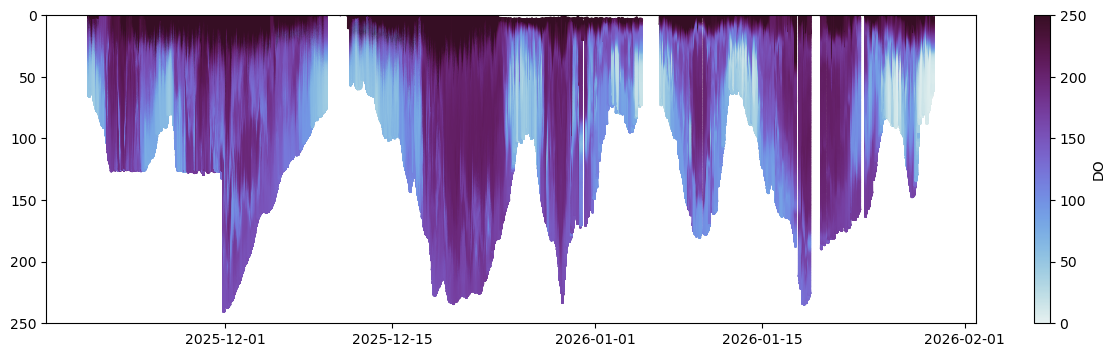

In [42]:
plt.figure(figsize=(15,4))
plt.scatter(time, pres, c=profile_index,cmap=cmo.dense,s=1, vmin=0, vmax=250, rasterized=True)
plt.colorbar(label='DO')

# plt.contour(time, pres, profile_index,levels=[60], colors='r', linewidths=0.1, ls=':', alpha=0.8)

plt.ylim(250,0)

C:\Users\estel\AppData\Local\Temp\ipykernel_17640\1192600262.py:5: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(time, pres, profile_index,levels=[60], colors='r', linewidths=0.1, ls=':', alpha=0.8)


(250.0, 0.0)

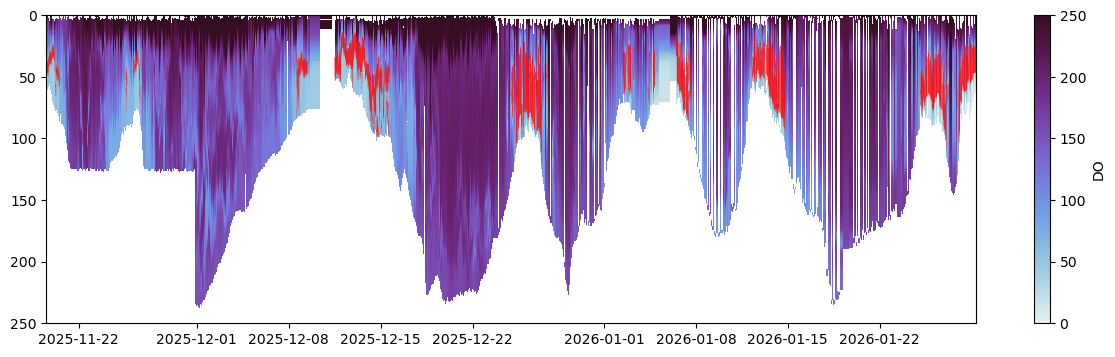

In [36]:
plt.figure(figsize=(15,4))
plt.pcolormesh(time, pres, profile_index,cmap=cmo.dense, vmin=0, vmax=250)
plt.colorbar(label='DO')

plt.contour(time, pres, profile_index,levels=[60], colors='r', linewidths=0.1, ls=':', alpha=0.8)

plt.ylim(250,0)

(250.0, 0.0)

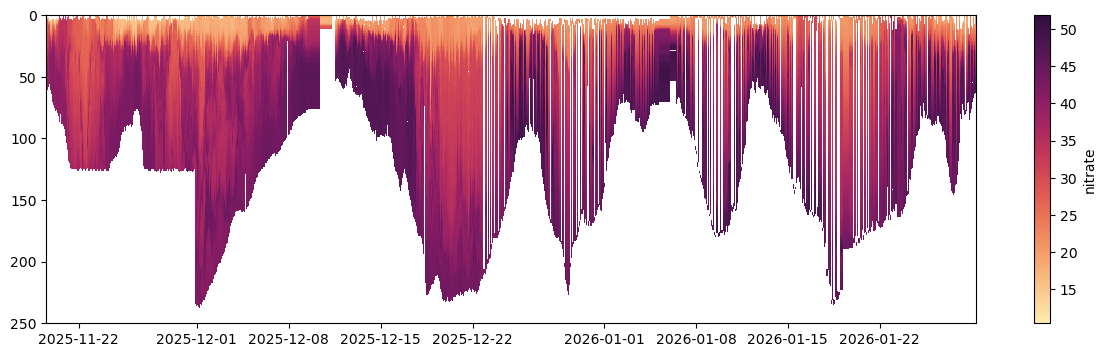

In [37]:
plt.figure(figsize=(15,4))
plt.pcolormesh(time, pres, ds.nitrogen_concentration,cmap=cmo.matter)
plt.colorbar(label='nitrate')

# plt.contour(time, pres, profile_index,levels=[60], colors='r', linewidths=0.1, ls=':', alpha=0.8)

plt.ylim(250,0)

(250.0, 0.0)

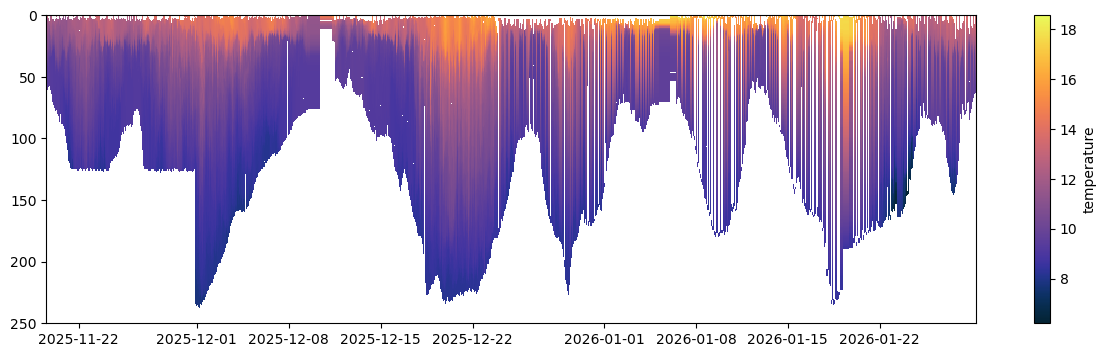

In [38]:
plt.figure(figsize=(15,4))
plt.pcolormesh(time, pres, ds.temperature,cmap=cmo.thermal)
plt.colorbar(label='temperature')

plt.ylim(250,0)

(250.0, 0.0)

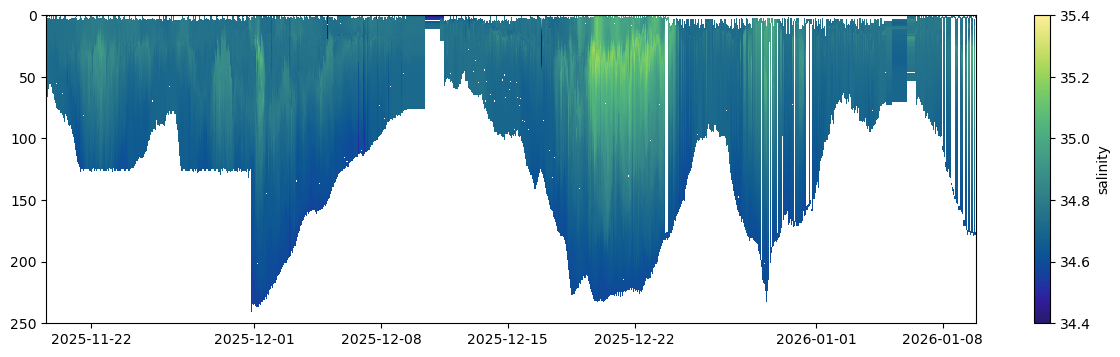

In [114]:
plt.figure(figsize=(15,4))
plt.pcolormesh(time, pres, ds.salinity,cmap=cmo.haline, vmin=34.4, vmax=35.4)
plt.colorbar(label='salinity')

plt.ylim(250,0)